In [2]:
!python c2_w1_nnforbinaryclassification.py

2023-06-02 04:39:39.887280: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-02 04:39:41.367460: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Traceback (most recent call last):
  File "/content/c2_w1_nnforbinaryclassification.py", line 24, in <module>
    x = np.load("data/C2_W1/data/X.npy")
  File "/usr/local/lib/python3.10/dist-packages/numpy/lib/npyio.py", line 407, in load
    fid = stack.enter_context(open(os_fspath(file), "rb"))
FileNotFoundError: [Errno 2] No such file or directory: 'data/C2_W1/data/X.npy'


In [5]:
%cd /content/drive/MyDrive/Colab Notebooks


/content/drive/MyDrive/Colab Notebooks
python3: can't open file '/content/drive/MyDrive/Colab Notebooks/c2_w1_nnforbinaryclassification.py': [Errno 2] No such file or directory


In [ ]:
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from google.colab.patches import cv2_imshow
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import L2
from sklearn.model_selection import train_test_split

In [ ]:
x = np.load("data/C2_W1/data/X.npy")
y = np.load("data/C2_W1/data/y.npy")
x = x[0:1000]
y = y[0:1000]
x_train,x_ = train_test_split(x,test_size=0.4,shuffle=True) 
y_train,y_ = train_test_split(y,test_size=0.4,shuffle=True)
x_cv,x_test = train_test_split(x_,test_size=0.5,shuffle=True)
y_cv,y_test = train_test_split(y_,test_size=0.5,shuffle=True)
display(np.shape(x_train))
display(np.shape(x_))
display(np.shape(x_cv))
display(np.shape(x_test))
display(np.shape(y_train))
display(np.shape(y_))
display(np.shape(y_cv))
display(np.shape(y_test))
del x_,y_
x_t = cv2.imread("data/C2_W2/data/1.png",0)
cv2_imshow(x_t)

(600, 400)

(400, 400)

(200, 400)

(200, 400)

(600, 1)

(400, 1)

(200, 1)

(200, 1)

In [ ]:
model = Sequential(
    [
        tf.keras.Input(shape=(400,)),
        Dense(25,activation="sigmoid",name='L5'),
        Dense(10,activation="sigmoid",name='L6'),
        Dense(1,activation="sigmoid",name='L7'),
    ] , name = "model"
) 

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L5 (Dense)                  (None, 25)                10025     
                                                                 
 L6 (Dense)                  (None, 10)                260       
                                                                 
 L7 (Dense)                  (None, 1)                 11        
                                                                 
Total params: 10,296
Trainable params: 10,296
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# layer1 = model.get_layer('L1')
# layer2 = model.get_layer('L2')
# layer3 = model.get_layer('L3')
# w1,b1 = layer1.get_weights()
# w2,b2 = layer2.get_weights()
# w3,b3 = layer3.get_weights()
# # display(np.shape(x))
# # display(np.shape(w1))
# # display(np.shape(b1))
# # display(np.shape(w2))
# # display(np.shape(b2))
# # display(np.shape(w3))
# # display(np.shape(b3))
# type(w1)

In [ ]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

In [ ]:
history = model.fit(
              x_train,y_train,
              epochs=500
          )

Epoch 1/500
19/19 [==============================] - 1s 3ms/step - loss: 0.6943
Epoch 2/500
19/19 [==============================] - 0s 3ms/step - loss: 0.6921
Epoch 3/500
19/19 [==============================] - 0s 3ms/step - loss: 0.6915
Epoch 4/500
19/19 [==============================] - 0s 3ms/step - loss: 0.6909
Epoch 5/500
19/19 [==============================] - 0s 2ms/step - loss: 0.6894
Epoch 6/500
19/19 [==============================] - 0s 2ms/step - loss: 0.6888
Epoch 7/500
19/19 [==============================] - 0s 3ms/step - loss: 0.6876
Epoch 8/500
19/19 [==============================] - 0s 3ms/step - loss: 0.6867
Epoch 9/500
19/19 [==============================] - 0s 3ms/step - loss: 0.6856
Epoch 10/500
19/19 [==============================] - 0s 3ms/step - loss: 0.6854
Epoch 11/500
19/19 [==============================] - 0s 3ms/step - loss: 0.6836
Epoch 12/500
19/19 [==============================] - 0s 4ms/step - loss: 0.6840
Epoch 13/500
19/19 [=================

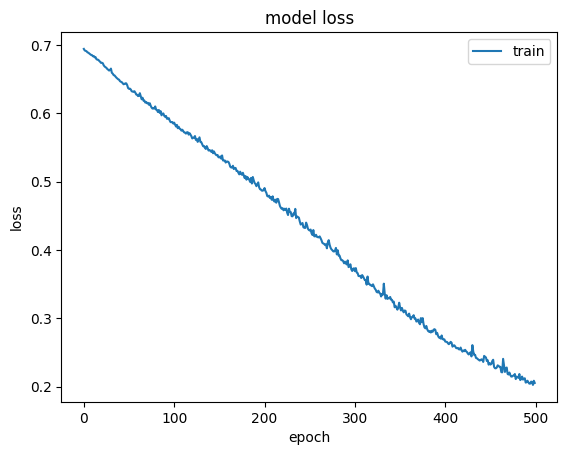

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

In [ ]:
def error(pred,y):
    wrong = 0;
    for i in range(np.size(pred)):
        if pred[i][0] != y[i][0]:
            wrong = wrong + 1
    err = wrong / np.size(pred);
    return err

In [ ]:
cv_pred = model.predict(x_cv)
cv_pred = cv_pred >= 0.5
cv_pred = cv_pred.astype(int)

train_pred = model.predict(x_train)
train_pred = train_pred >= 0.5
train_pred = train_pred.astype(int)


cv_error = error(cv_pred,y_cv);

train_error = error(train_pred,y_train)

display(cv_error)
display(train_error)

19/19 [==============================] - 0s 2ms/step


0.54

0.07833333333333334